## Проверяем работу регуляризации в полиномиальной регрессии
1. Генерируем выборку для нашего примера
1. Делаем восстановление зависимости полиномом
1. Строим график восстановленной зависимости для разных С

Соответствует лекции 11

In [26]:
import numpy as np
L = 50 #количество  точек обучающей выборки
x = np.linspace(-5, 5, 50)
print x

[-5.         -4.79591837 -4.59183673 -4.3877551  -4.18367347 -3.97959184
 -3.7755102  -3.57142857 -3.36734694 -3.16326531 -2.95918367 -2.75510204
 -2.55102041 -2.34693878 -2.14285714 -1.93877551 -1.73469388 -1.53061224
 -1.32653061 -1.12244898 -0.91836735 -0.71428571 -0.51020408 -0.30612245
 -0.10204082  0.10204082  0.30612245  0.51020408  0.71428571  0.91836735
  1.12244898  1.32653061  1.53061224  1.73469388  1.93877551  2.14285714
  2.34693878  2.55102041  2.75510204  2.95918367  3.16326531  3.36734694
  3.57142857  3.7755102   3.97959184  4.18367347  4.3877551   4.59183673
  4.79591837  5.        ]


In [27]:
def true_poly(x):
    return 0.1*x**4 + 0.2*x**3 - 0.25*x**2 + 2*x - 1
y= true_poly(x)
print y

[  2.02500000e+01   1.44997633e+01   9.63891559e+00   5.58190304e+00
   2.24733521e+00  -4.42015214e-01  -2.55921232e+00  -4.17315702e+00
  -5.34858701e+00  -6.14607681e+00  -6.62203773e+00  -6.82871790e+00
  -6.81420222e+00  -6.62241242e+00  -6.29310704e+00  -5.86188140e+00
  -5.36016764e+00  -4.81523469e+00  -4.25018830e+00  -3.68397101e+00
  -3.13136217e+00  -2.60297793e+00  -2.10527124e+00  -1.64053187e+00
  -1.20688637e+00  -7.98298111e-01  -4.04567261e-01  -1.13307901e-02
   3.99937526e-01   8.51927109e-01   1.37149058e+00   1.98964374e+00
   2.74156562e+00   3.66659842e+00   4.80824754e+00   6.21418159e+00
   7.93623236e+00   1.00303948e+01   1.25568272e+01   1.55798509e+01
   1.91679505e+01   2.33937737e+01   2.83341316e+01   3.40699983e+01
   4.06865112e+01   4.82729708e+01   5.69228409e+01   6.67337485e+01
   7.78074838e+01   9.02500000e+01]


In [28]:
import matplotlib.pylab as plt

In [29]:
%matplotlib inline

<function matplotlib.pyplot.show>

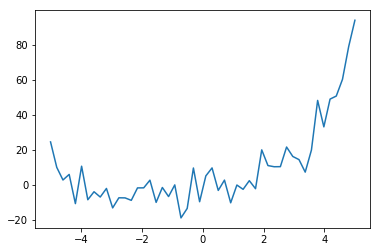

In [30]:
y_with_noise = y+6*np.random.randn(L)

plt.plot(x, y_with_noise)
plt.show

In [31]:
#2
def poly(x, coeffs):
    return sum([coeffs[k]*x**k for k in range(len(coeffs))])

In [32]:
poly(1, [0.1, 4, 0.2, -0.25, 2, -1][::-1])

5.05

In [45]:
C=0
def loss(coeffs):
    loss = 0.0
    for a, b in zip(x, y_with_noise):
        loss += sum((poly(x, coeffs) - y_with_noise) **2)
    loss += C*sum(coeffs**2)
    return loss

In [50]:
from scipy.optimize import minimize

result = minimize(loss, np.array([0.001]*(20))) #L-1

<function matplotlib.pyplot.show>

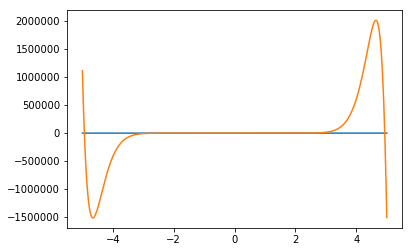

In [51]:
plt.plot(x, y_with_noise)
x_detailed = np.linspace(-5,5,500)
plt.plot(x_detailed, poly(x_detailed, result.x))
plt.show